In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import svm


In [2]:
#------------set-up---------------
data_in_name = "data_out.csv"
random_state = 31 
test_split = 0.20
kernel = "linear"
c = 1
#---------------------------------
df = pd.read_csv(data_in_name)
df = df.iloc[: , 1:5]
df

,room,rod,tp,lid
0,1,-29,-83,-51
1,1,-29,-78,-39
2,1,-44,-80,-59
3,1,-34,-88,-56
4,1,-43,-84,-58
5,1,-34,-88,-40
6,1,-50,-77,-47
7,1,-32,-87,-58
8,1,-48,-85,-55
9,1,-39,-87,-52


In [151]:
X = df[df.columns.difference(["room"])]
y = df["room"]

y.value_counts()

2    10
3     8
1     7
Name: room, dtype: int64

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, random_state=random_state)
y_test.value_counts()

2    2
3    2
1    1
Name: room, dtype: int64

In [54]:
y_train.value_counts()

2    8
1    6
3    6
Name: room, dtype: int64

In [134]:
clf = svm.SVC(kernel = kernel, C = c)
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [55]:
X_test

,lid,rod,tp
10,-21,-66,-72
16,-28,-55,-76
19,-58,-74,-61
0,-33,-34,-72
23,-72,-73,-63


In [56]:
y_test

10    2
16    2
19    3
0     1
23    3
Name: room, dtype: int64

In [103]:
y_pred = clf.predict(X_test)
y_pred

array([2, 2, 3, 1, 3], dtype=int64)

1.0
1.0
1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



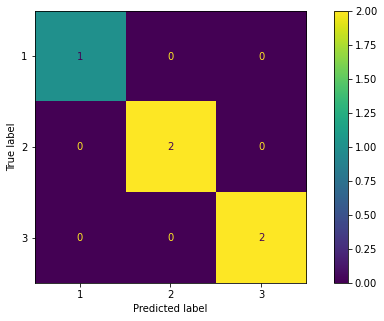

In [104]:
plt.rcParams['figure.figsize'] = 10, 5

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

print(classification_report(y_test,y_pred))
plot_confusion_matrix(clf, X_test, y_test)

In [62]:
!pip install micromlgen

  Created wheel for micromlgen: filename=micromlgen-1.1.26-py3-none-any.whl size=32009 sha256=5bd7fee6e3a8d0d5e121e7c814353400492eacf09178726871443446d94ce3c8
  Stored in directory: c:\users\tvaro\appdata\local\pip\cache\wheels\25\2a\d4\195cdb95ed96283de8b2a478d8e64036f8d9992e575df00994
Successfully built micromlgen


In [63]:
from micromlgen import port

In [72]:
LABELS = ['1','2','3'] #our existing labels
classMap = {} #create an empty dict
for i, label in zip(range(3),LABELS): #interate over the range and the labels at the same time 
  classMap[i]=label #fill our dict

print(classMap)

{0: '1', 1: '2', 2: '3'}


In [74]:
c_code = port(clf,classmap=classMap) #convert our model
modelFile = open("model.h", "w")
modelFile.write(c_code)
modelFile.close()

#Let's print the size of the .h file
import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 4,009 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
